Greyscale ℓ2-TV Denoising
=========================

This example demonstrates the use of class [tvl2.TVL2Denoise](http://sporco.rtfd.org/en/latest/sporco.admm.tvl2.html#sporco.admm.tvl2.TVL2Denoise) for removing Gaussian white noise from a greyscale image using Total Variation regularization with an ℓ2 data fidelity term (ℓ2-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by Gaussian white noise with a 0.05 standard deviation.

In [3]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.05, img.shape)

Set regularization parameter and options for ℓ2-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 0.04
opt = tvl2.TVL2Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                'gEvalY': False, 'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl2.TVL2Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ         
----------------------------------------------------------------
   0  7.87e+02  7.58e+01  1.78e+04  6.75e-01  4.44e-01  1.80e-01


   1  6.27e+02  2.26e+02  1.00e+04  2.95e-01  1.40e-01  1.80e-01
   2  6.10e+02  2.54e+02  8.90e+03  1.73e-01  1.02e-01  2.62e-01


   3  5.98e+02  2.66e+02  8.28e+03  1.08e-01  7.16e-02  3.41e-01
   4  5.91e+02  2.67e+02  8.12e+03  7.36e-02  5.54e-02  4.19e-01


   5  5.88e+02  2.67e+02  8.01e+03  5.24e-02  4.36e-02  4.83e-01
   6  5.86e+02  2.67e+02  7.97e+03  3.87e-02  3.37e-02  5.30e-01


   7  5.85e+02  2.68e+02  7.92e+03  2.94e-02  2.51e-02  5.30e-01
   8  5.84e+02  2.67e+02  7.90e+03  2.29e-02  1.85e-02  5.30e-01


   9  5.83e+02  2.68e+02  7.88e+03  1.82e-02  1.51e-02  5.91e-01
  10  5.82e+02  2.67e+02  7.87e+03  1.47e-02  1.35e-02  6.49e-01


  11  5.82e+02  2.67e+02  7.86e+03  1.20e-02  1.14e-02  6.49e-01
  12  5.82e+02  2.67e+02  7.86e+03  9.98e-03  9.17e-03  6.49e-01


  13  5.81e+02  2.67e+02  7.86e+03  8.38e-03  7.43e-03  6.49e-01
  14  5.81e+02  2.67e+02  7.85e+03  7.15e-03  6.19e-03  6.49e-01


  15  5.81e+02  2.67e+02  7.85e+03  6.18e-03  5.13e-03  6.49e-01
  16  5.81e+02  2.67e+02  7.85e+03  5.38e-03  4.61e-03  7.12e-01


  17  5.81e+02  2.67e+02  7.85e+03  4.75e-03  4.22e-03  7.12e-01
  18  5.81e+02  2.67e+02  7.85e+03  4.22e-03  3.67e-03  7.12e-01


  19  5.81e+02  2.67e+02  7.85e+03  3.77e-03  3.18e-03  7.12e-01
  20  5.81e+02  2.67e+02  7.85e+03  3.40e-03  2.82e-03  7.12e-01


  21  5.81e+02  2.67e+02  7.85e+03  3.08e-03  2.62e-03  7.82e-01
  22  5.81e+02  2.67e+02  7.85e+03  2.80e-03  2.48e-03  7.82e-01


  23  5.81e+02  2.67e+02  7.84e+03  2.56e-03  2.24e-03  7.82e-01
  24  5.81e+02  2.67e+02  7.84e+03  2.35e-03  2.02e-03  7.82e-01


  25  5.80e+02  2.67e+02  7.84e+03  2.17e-03  1.81e-03  7.82e-01
  26  5.80e+02  2.67e+02  7.84e+03  2.00e-03  1.62e-03  7.82e-01


  27  5.80e+02  2.67e+02  7.84e+03  1.85e-03  1.57e-03  8.71e-01
  28  5.80e+02  2.67e+02  7.84e+03  1.72e-03  1.55e-03  8.71e-01


  29  5.80e+02  2.67e+02  7.84e+03  1.60e-03  1.44e-03  8.71e-01
  30  5.80e+02  2.67e+02  7.84e+03  1.49e-03  1.32e-03  8.71e-01


  31  5.80e+02  2.67e+02  7.84e+03  1.39e-03  1.22e-03  8.71e-01
  32  5.80e+02  2.67e+02  7.84e+03  1.30e-03  1.13e-03  8.71e-01


  33  5.80e+02  2.67e+02  7.84e+03  1.22e-03  1.01e-03  8.71e-01
  34  5.80e+02  2.67e+02  7.84e+03  1.14e-03  9.67e-04  9.55e-01


  35  5.80e+02  2.67e+02  7.84e+03  1.08e-03  9.58e-04  9.55e-01
  36  5.80e+02  2.67e+02  7.84e+03  1.01e-03  8.99e-04  9.55e-01


  37  5.80e+02  2.67e+02  7.84e+03  9.57e-04  8.16e-04  9.55e-01
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL2Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Denoise solve time:  5.14 s
Noisy image PSNR:    25.30 dB
Denoised image PSNR: 32.64 dB


Display reference, corrupted, and denoised images.

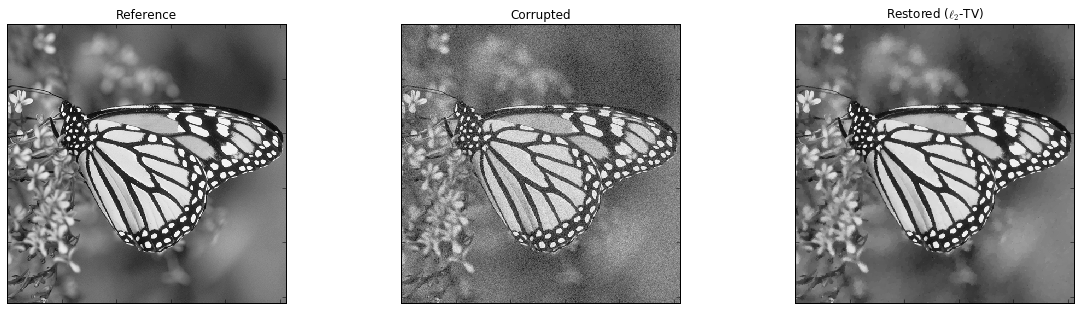

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, fig=fig, title='Reference')
plot.subplot(1, 3, 2)
plot.imview(imgn, fig=fig, title='Corrupted')
plot.subplot(1, 3, 3)
plot.imview(imgr, fig=fig, title=r'Restored ($\ell_2$-TV)')
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

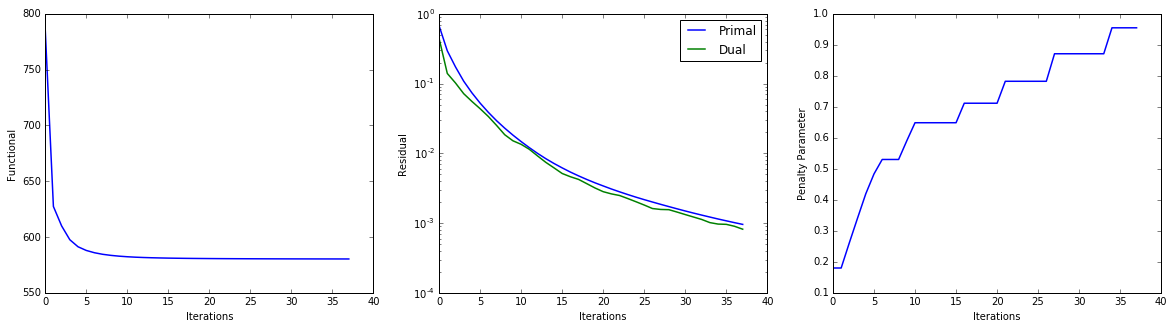

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fig=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, fig=fig,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'])
plot.subplot(1, 3, 3)
plot.plot(its.Rho, fig=fig, xlbl='Iterations', ylbl='Penalty Parameter')
fig.show()